## 前言
这个Workshop展示了TensorFlow中的线性回归模型，使用模型完成了直线拟合的任务。通过本例可以看到机器学习的一个通用过程：
1.准备数据 -> 2.构造模型（设置求解目标函数） -> 3.求解模型

In [2]:
# 保持python2和python3 兼容
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os

import numpy as np
import pylab
import tensorflow as tf

# A special command for IPython Notebooks that
# intructs Matplotlib to display plots in the notebook
%matplotlib inline

In [3]:
# This is a directory we'll use to store information
# about the graph to later visualize in TensorBoard.
# By default, it will be created in the same directory
# as this notebook. 

# Be sure to delete the contents of this directory before
# running the script.
LOGDIR = './graphs'

In [4]:
tf.reset_default_graph()
sess = tf.Session()

根据方程式，该函数将创建一个大致线性的嘈杂数据集 *y = mx + b + noise*

In [5]:
def make_noisy_data(m=0.1, b=0.3, n=100):
    x = np.random.rand(n).astype(np.float32)
    noise = np.random.normal(scale=0.01, size=len(x))
    y = m * x + b + noise
    return x, y

### 1.创建训练与测试数据集

In [6]:
x_train, y_train = make_noisy_data()
x_test, y_test = make_noisy_data()

绘制训练与测试数据

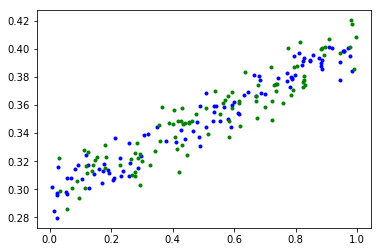

In [7]:
#Uncomment the following lines to plot the data.
pylab.plot(x_train, y_train, 'b.')
pylab.plot(x_test, y_test, 'g.')

### 2.定义传入数据到数据流图中的占位符

In [8]:
# tf.name_scope is used to make a graph legible in the TensorBoard graph explorer
# shape=[None] means x_placeholder is a one dimensional array of any length. 
# name='x' gives TensorBoard a display name for this node.
#命名域
with tf.name_scope('input'):    
    x_placeholder = tf.placeholder(shape=[None], dtype=tf.float32, name='x-input')
    y_placeholder = tf.placeholder(shape=[None], dtype=tf.float32, name='y-input')

In [16]:
# print(x_placeholder)
# print(y_placeholder)

### 3.定义模型

在这里，我们将使用线性模型：* y = mx + b *

In [9]:
with tf.name_scope('model'):
    m = tf.Variable(tf.random_normal([1]), name='m')
    b = tf.Variable(tf.random_normal([1]), name='b')
    # This is the same as y = tf.add(tf.mul(m, x_placeholder), b), but looks nicer
    y = m * x_placeholder + b

In [10]:
# Uncomment the following lines to see what m, b, and y are
print(m)
print(b)


<tf.Variable 'model/m:0' shape=(1,) dtype=float32_ref>
<tf.Variable 'model/b:0' shape=(1,) dtype=float32_ref>


### 4.定义损失函数与优化器
这里我们使用squared损失函数与 gradient descent优化器

In [11]:
LEARNING_RATE = 0.5

with tf.name_scope('training'):
    with tf.name_scope('loss'):
        loss = tf.reduce_mean(tf.square(y - y_placeholder))
    with tf.name_scope('optimizer'):
        optimizer = tf.train.GradientDescentOptimizer(LEARNING_RATE)
        train = optimizer.minimize(loss) 

In [25]:

# print("loss:", loss)
# print("optimizer:", optimizer)
# print("train_step:", train)

### 5.配置TensorBoard

In [12]:
# 写入数据流图
writer = tf.summary.FileWriter(LOGDIR)
writer.add_graph(sess.graph)

# Attach summaries to Tensors (for TensorBoard visualization)
tf.summary.histogram('m', m)
tf.summary.histogram('b', b)
tf.summary.scalar('loss', loss)

# 合并数据
summary_op = tf.summary.merge_all()

### 6. 初始化变量

At this point, our graph is complete. We're now ready to initialize variables, then begin training.

In [13]:
sess.run(tf.global_variables_initializer()) # import

### 7. 训练

0 [array([ 0.08009493], dtype=float32), array([ 0.21325892], dtype=float32)]
20 [array([ 0.11098001], dtype=float32), array([ 0.29380444], dtype=float32)]
40 [array([ 0.10874568], dtype=float32), array([ 0.2950266], dtype=float32)]
60 [array([ 0.10825329], dtype=float32), array([ 0.29529592], dtype=float32)]
80 [array([ 0.10814478], dtype=float32), array([ 0.29535529], dtype=float32)]
100 [array([ 0.10812085], dtype=float32), array([ 0.29536837], dtype=float32)]
120 [array([ 0.10811559], dtype=float32), array([ 0.29537123], dtype=float32)]
140 [array([ 0.10811442], dtype=float32), array([ 0.29537189], dtype=float32)]
160 [array([ 0.10811418], dtype=float32), array([ 0.29537201], dtype=float32)]
180 [array([ 0.10811418], dtype=float32), array([ 0.29537201], dtype=float32)]
200 [array([ 0.10811418], dtype=float32), array([ 0.29537201], dtype=float32)]
[ 0.33251271  0.39732522  0.37521532  0.37429357  0.32531041  0.37920219
  0.30861983  0.30555794  0.40119341  0.35123059  0.3503862   0.3

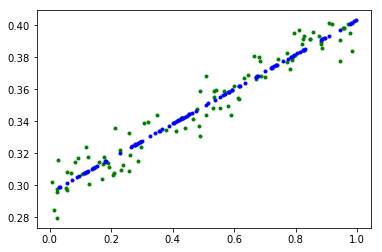

In [14]:
TRAIN_STEPS = 201

for step in range(TRAIN_STEPS):
    
    # Session 将会运行俩个操作
    # - summary_op prepares summary data we'll write to disk in a moment
    # - train will use the optimizer to adjust our variables to reduce loss
    summary_result, _ = sess.run([summary_op, train], 
                                  feed_dict={x_placeholder: x_train, 
                                             y_placeholder: y_train})
    # write the summary data to disk
    writer.add_summary(summary_result, step)
    
    # Uncomment the following two lines to watch training happen real time.
    if step % 20 == 0:
        print(step, sess.run([m, b]))
    
# 当我们完成的时候关闭写入
writer.close()
prediction_value = sess.run(y, feed_dict={x_placeholder: x_test})
print(prediction_value)
pylab.plot(x_train, y_train, 'g.')
pylab.plot(x_test, prediction_value, 'b.')

训练完后 m 与 b的值

In [15]:
print ("m: %f, b: %f" % (sess.run(m), sess.run(b)))

m: 0.108114, b: 0.295372


### 8. 预测
使用训练好的结果进行一次预测

In [37]:
# Use the trained model to make a prediction!
# Remember that x_placeholder must be a vector, hence [2] not just 2.
# We expect the result to be (about): 2 * 0.1 + 0.3 + noise ~= 0.5
sess.run(y, feed_dict={x_placeholder: [2]})

array([ 0.51160038], dtype=float32)

### 9. 使用TensorBoard观察训练结果

In [18]:

# $ tensorboard --logdir=graphs


In [52]:
import tensorflow as tf;    
import numpy as np;    
import matplotlib.pyplot as plt;    
  
with tf.name_scope('V1'):  
#     a1 = tf.get_variable(name='a1', shape=[1], initializer=tf.constant_initializer(1))  
    a2 = tf.Variable(tf.random_normal(shape=[2,3], mean=0, stddev=1), name='a2')  
with tf.name_scope('V2'):  
#     a3 = tf.get_variable(name='a1', shape=[1], initializer=tf.constant_initializer(1))  
    a4 = tf.Variable(tf.random_normal(shape=[2,3], mean=0, stddev=1), name='a2')  
    
with tf.Session() as sess:  
    sess.run(tf.initialize_all_variables())  
#     print(a1.name)  
    print(a2.name) 
#     print(a3.name)  
    print(a4.name) 

Instructions for updating:
Use `tf.global_variables_initializer` instead.
V1_7/a2:0
V2_3/a2:0
